# Numerical Exercises 11

## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.



## Solution

In order to explore the performance of the linear regression model, we can vary the number of epochs, the number of training data points, and the noise level. 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'

Here i will vary the noise parameter $\sigma$.

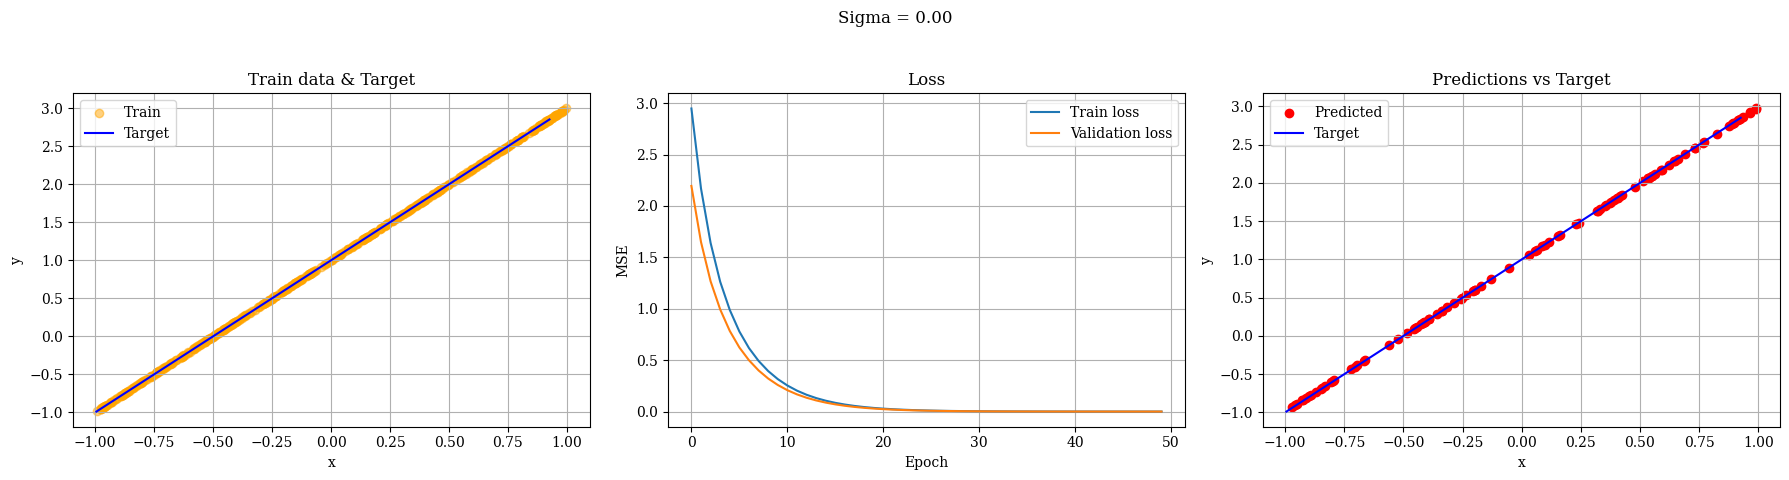

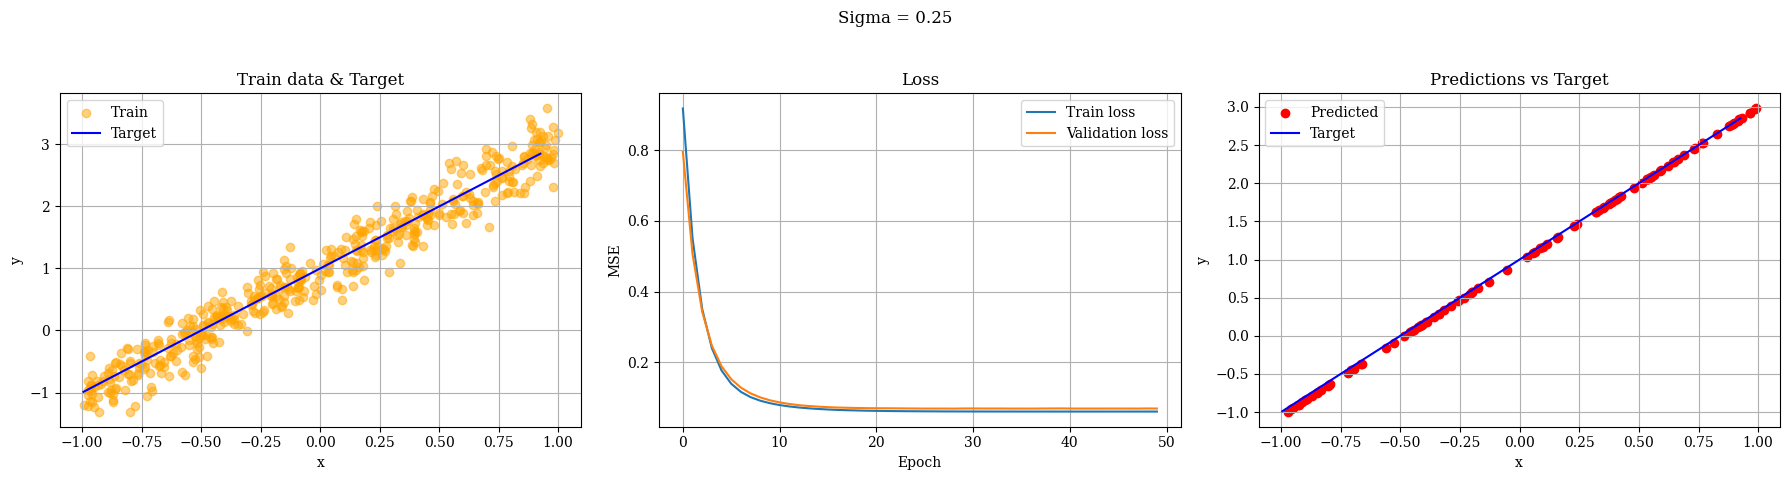

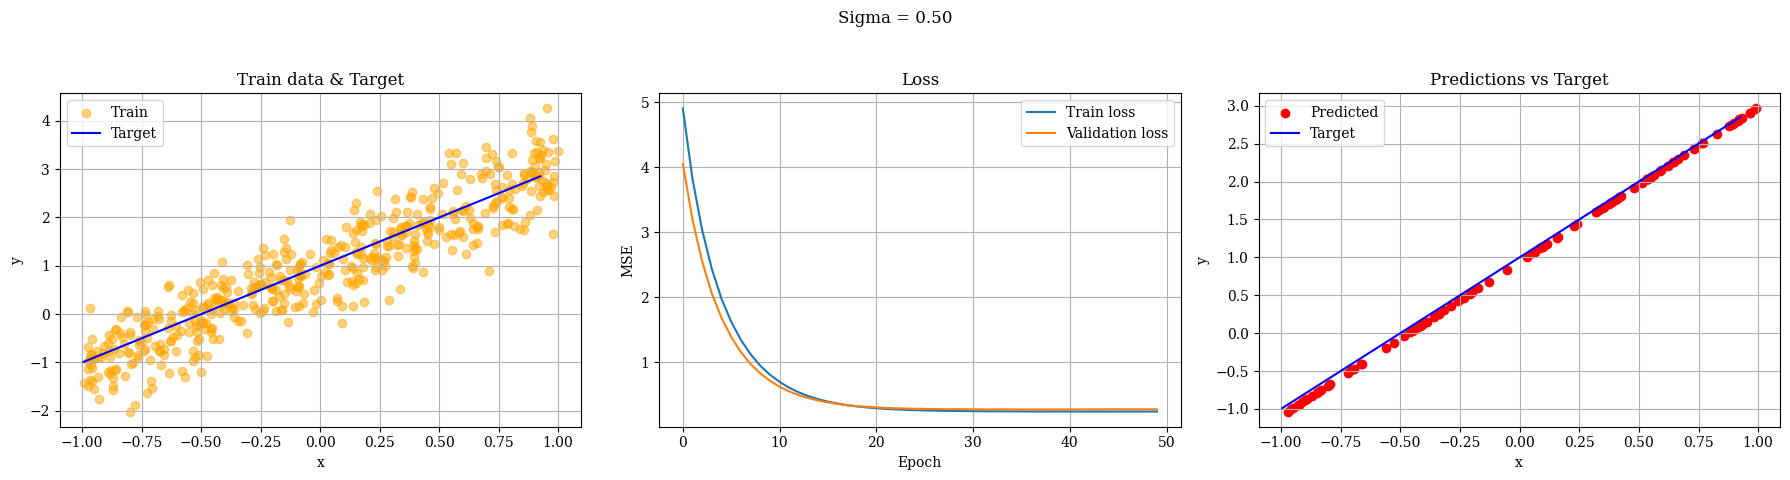

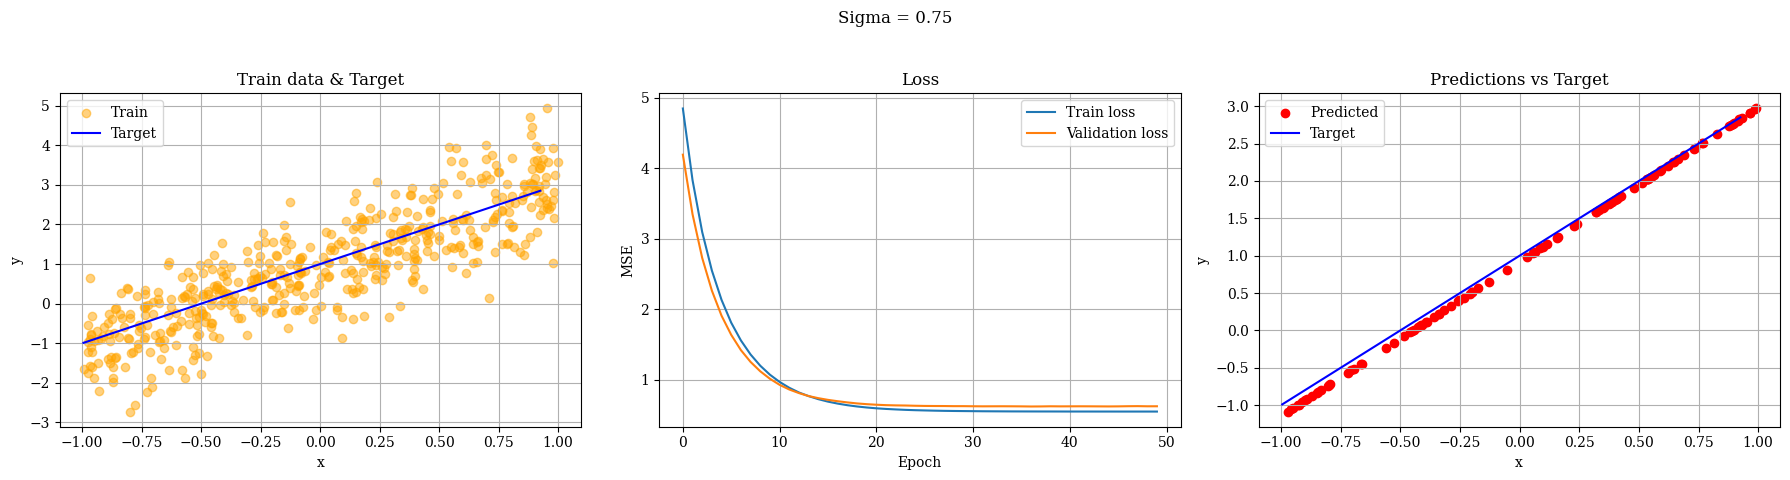

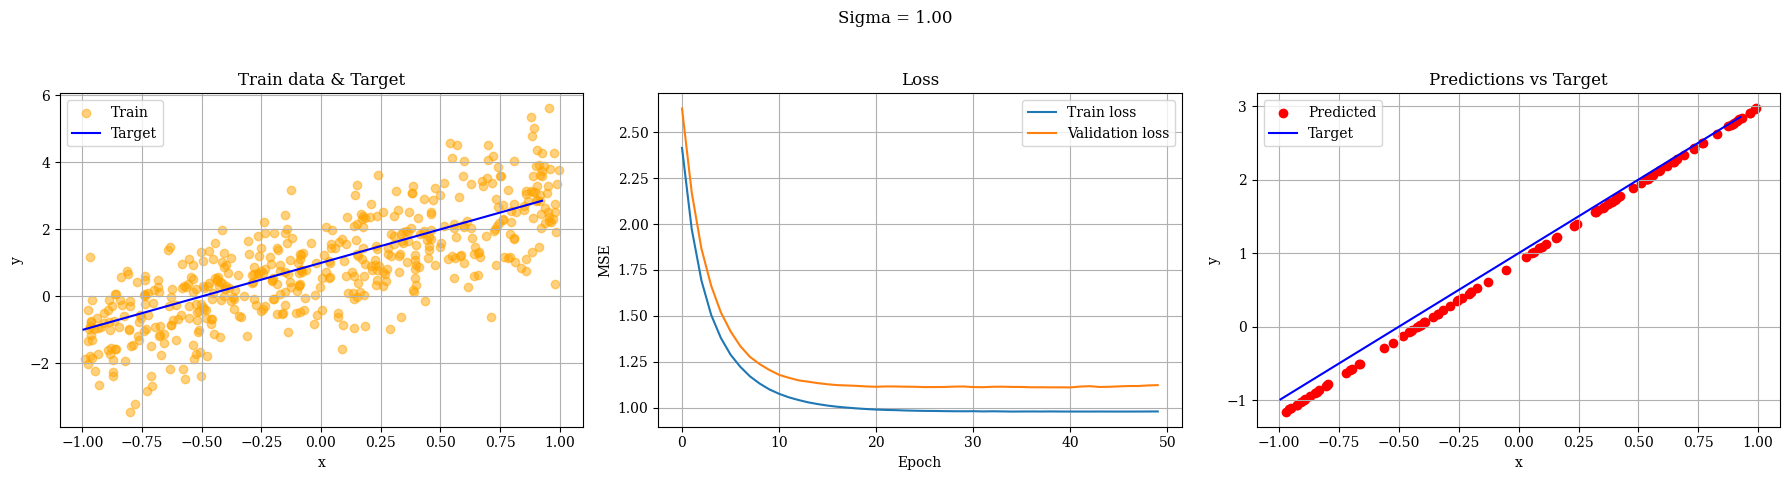

In [7]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

N_train = 500
N_epochs = 50

sigmas = np.linspace(0, 1, 5) 
validation_losses_sigma = []

for sigma in sigmas:
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train,
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_valid, y_valid),
              verbose=0
              )

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)
    
    validation_losses_sigma.append(history.history['val_loss'])

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Sigma = {sigma:.2f}")

    axs[0].scatter(x_train, y_train, color='orange', alpha=0.5, label='Train')
    axs[0].plot(x_valid, y_target, color='b', label='Target')
    axs[0].set_title('Train data & Target')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(history.history['loss'], label='Train loss')
    axs[1].plot(history.history['val_loss'], label='Validation loss')
    axs[1].set_title('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)

    axs[2].scatter(x_predicted, y_predicted, color='r', label='Predicted')
    axs[2].plot(x_valid, y_target, color='b', label='Target')
    axs[2].set_title('Predictions vs Target')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

From these plots, we can see that as the noise level increases, the model's performance decreases a little both from the point of view of validation and training loss. After about 20 epochs the loss reaches the plateau.

Now i will vary the number of training data points $N_{\mathrm{train}}$. In Machine Learning, the dataset size is a crucial factor that can significantly affect the performance of the model. It is a good practice to use a validation set size proportional to the training set size. Here, I will use a validation set size of 20% of the training set size.

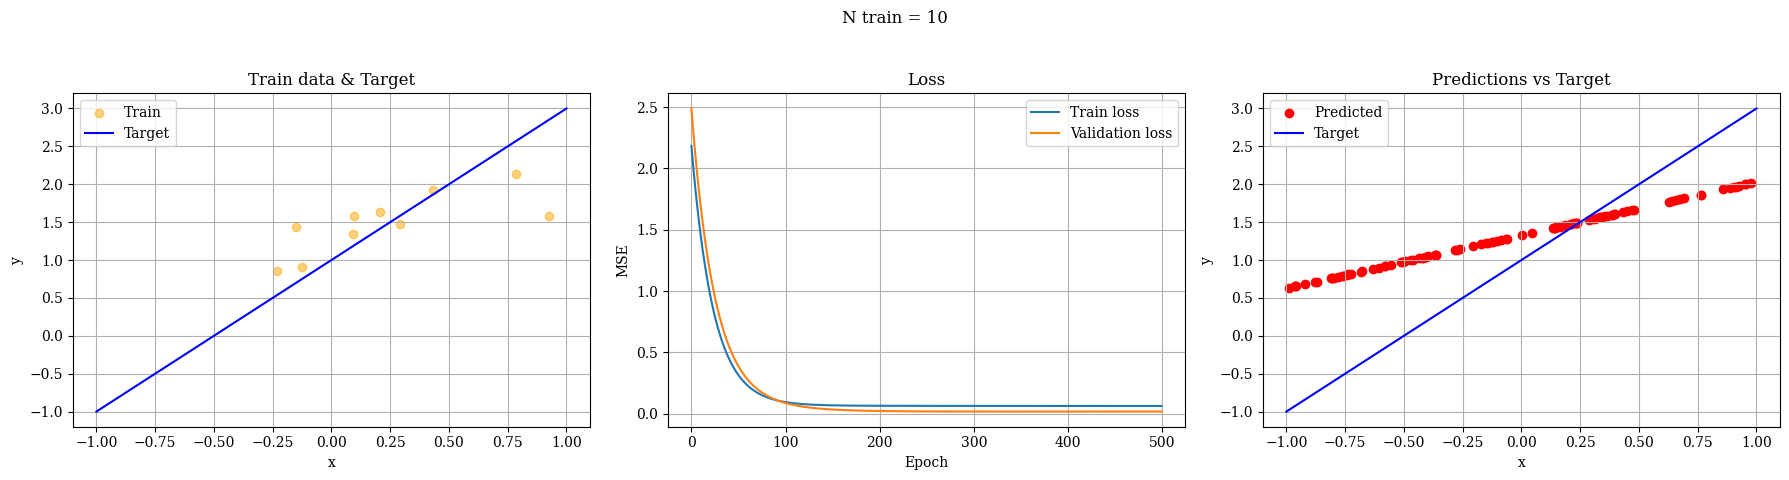

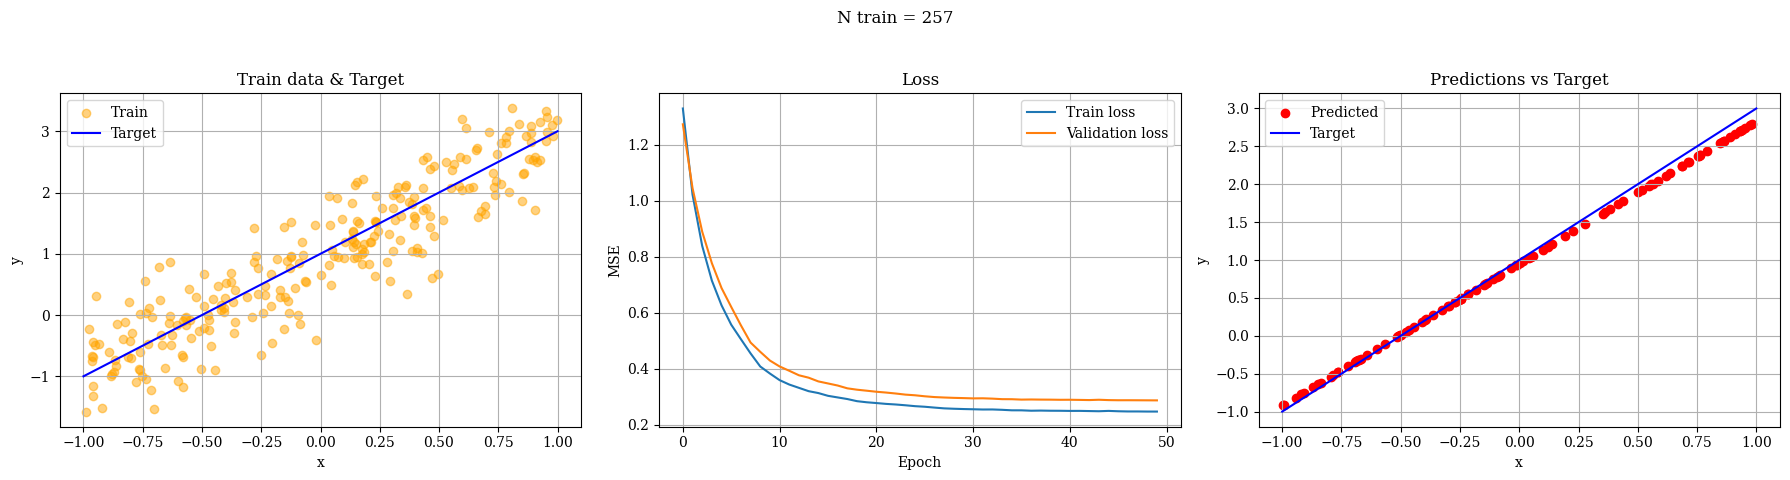

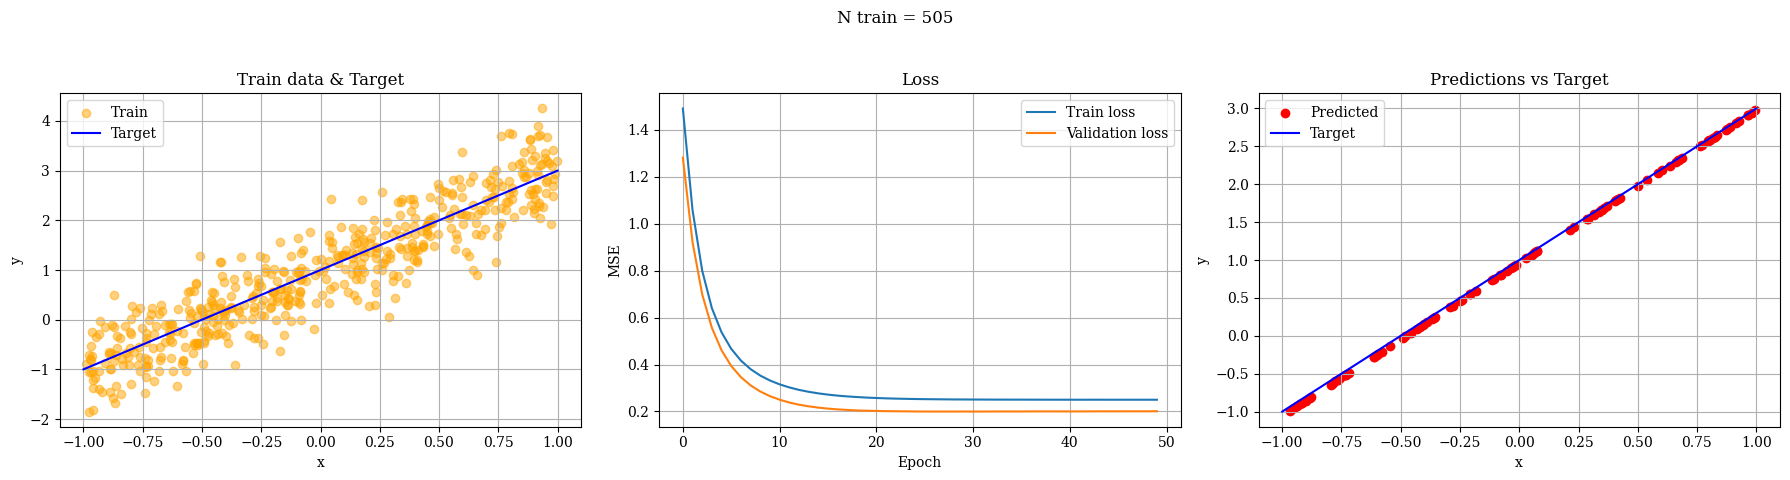

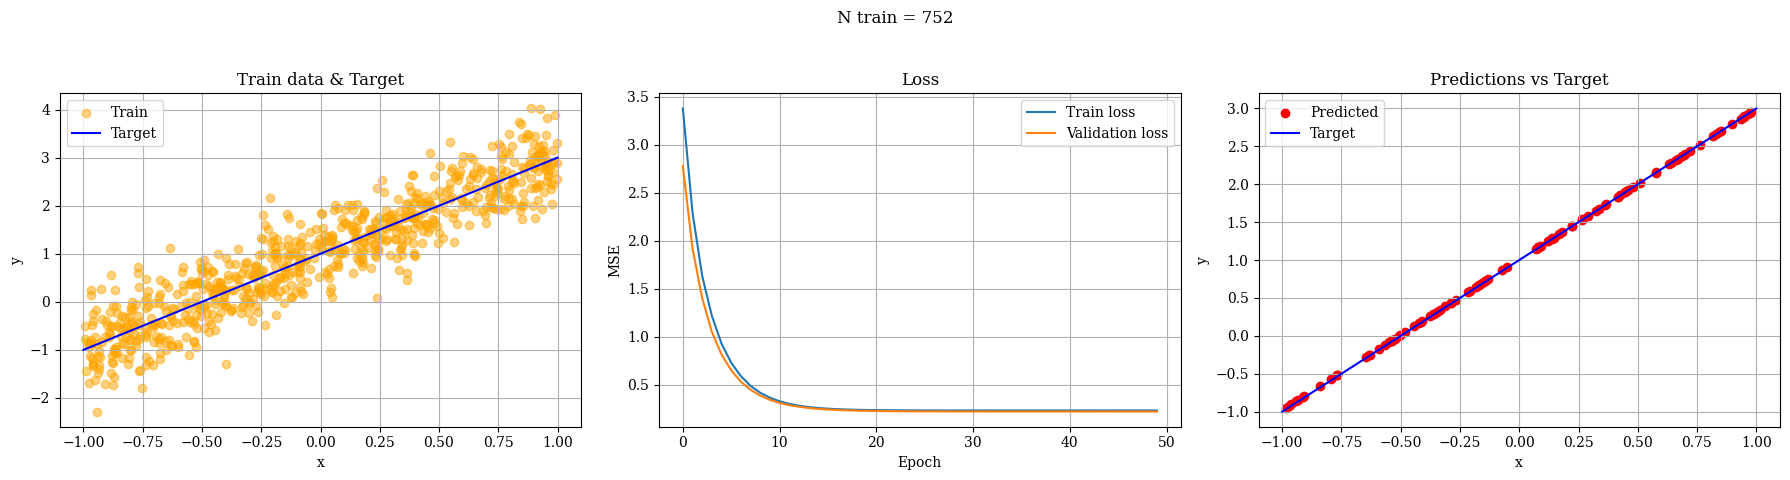

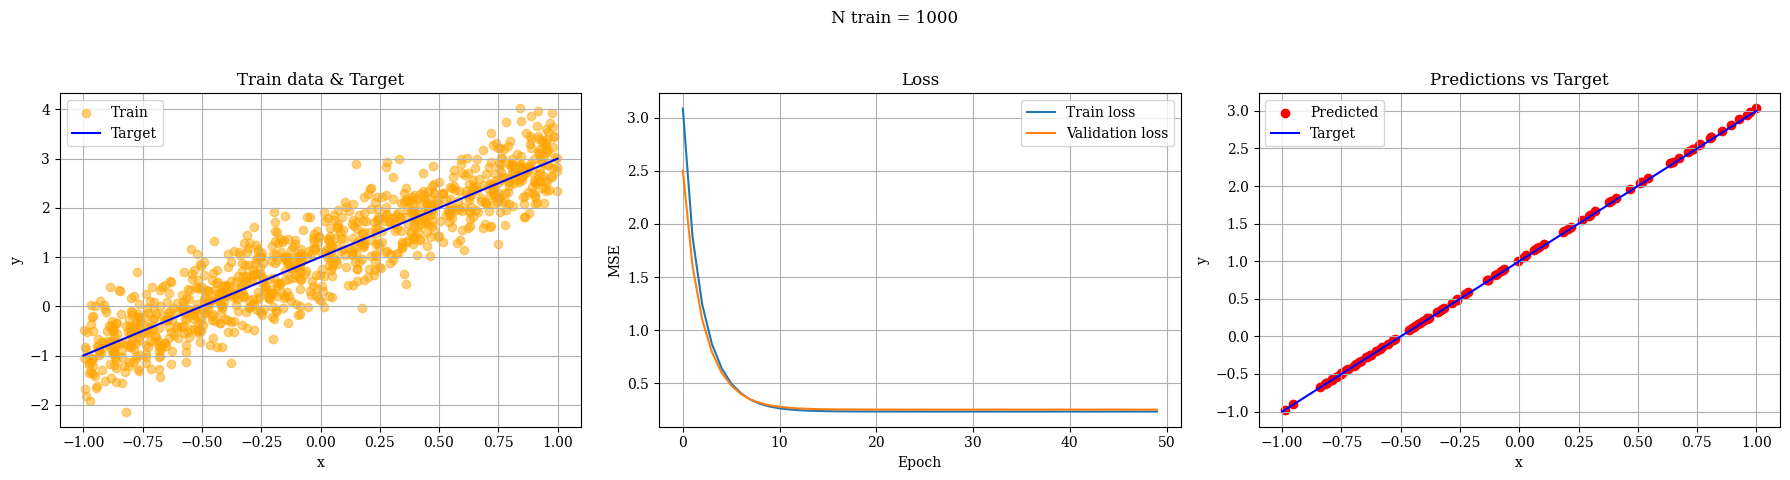

In [8]:
sigma = 0.5

validation_losses_train = []
N_train = np.linspace(10, 1000, 5, dtype=int)

for N in N_train:
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N)
    x_valid = np.random.uniform(-1, 1, (N * 0.2).astype(int))
    x_valid.sort()

    N_epochs = 50 if N > 100 else 500

    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train,
                        batch_size=32, epochs=N_epochs,
                        shuffle=True,
                        validation_data=(x_valid, y_valid),
                        verbose=0)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)

    validation_losses_train.append(history.history['val_loss'])

    x_plot = np.linspace(-1, 1, 200)
    y_plot = m * x_plot + b

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"N train = {N}")

    axs[0].scatter(x_train, y_train, color='orange', alpha=0.5, label='Train')
    axs[0].plot(x_plot, y_plot, color='b', label='Target')
    axs[0].set_title('Train data & Target')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(history.history['loss'], label='Train loss')
    axs[1].plot(history.history['val_loss'], label='Validation loss')
    axs[1].set_title('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)

    idx_sort = np.argsort(x_predicted)
    axs[2].scatter(x_predicted[idx_sort], y_predicted[idx_sort], color = 'r', label='Predicted')
    axs[2].plot(x_plot, y_plot, color='b', label='Target')
    axs[2].set_title('Predictions vs Target')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

To better understand the performance trend, let's zoom in on the validation loss

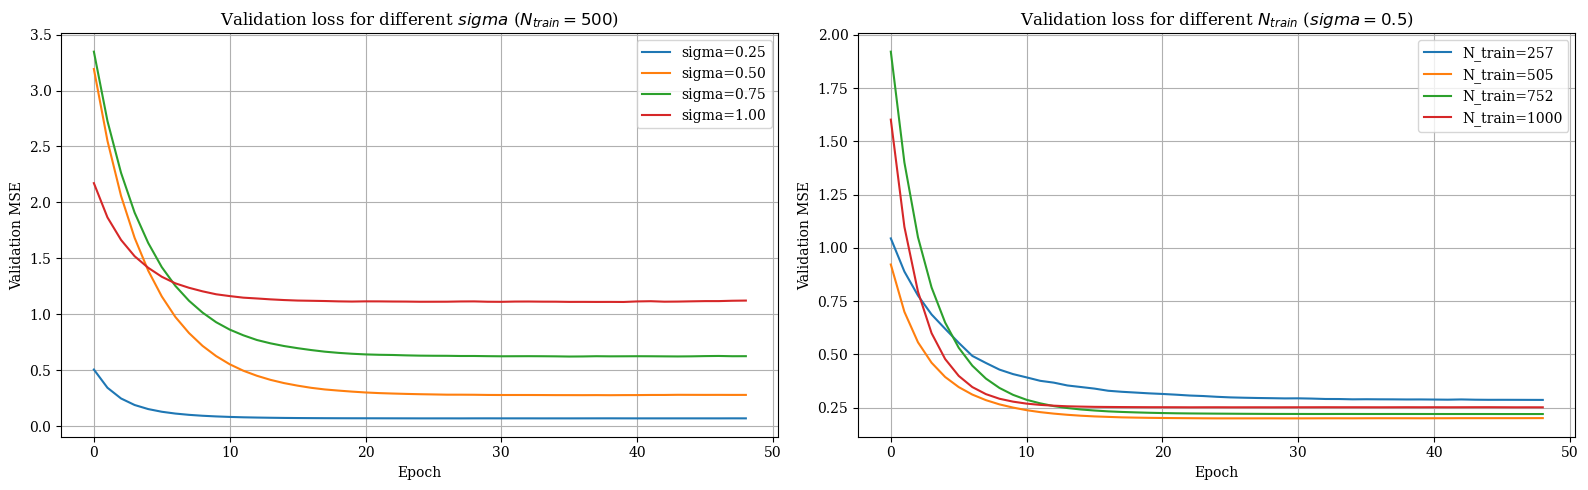

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

for i, val_loss in enumerate(validation_losses_sigma[1:]):
    axs[0].plot(val_loss[1:], label=f'sigma={sigmas[i+1]:.2f}')
axs[0].set_title(r'Validation loss for different $sigma$ ($N_{train}=500$)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Validation MSE')
axs[0].legend()
axs[0].grid(True)

for i, val_loss in enumerate(validation_losses_train[1:]):
    axs[1].plot(val_loss[1:], label=f'N_train={N_train[i+1]}')
axs[1].set_title(r'Validation loss for different $N_{train}$ ($sigma = 0.5$)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Validation MSE')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

#### Some observations:

- By lowering the dataset size the model needs more epochs to converge but performance are similar in terms of validation loss. This is because with fewer data points, the model has less information to learn from, which can lead to slower convergence.

- More noise leads naturally to a higher validation loss, The model struggles to learn the underlying patterns in the data, resulting in a higher validation loss.

- Overfitting is not observed in this case, as the model is really simple and the dataset is not too small. A slight upward trend can be seen for some of the validation loss curves, but the raise is not significant.

## Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Solution

To find the optimal hyperparameters for the neural network, I'll conduct a manual grid search across a reasonable range of values for the number of layers, neurons, activation functions, optimizers, and loss functions.

When it comes to the number of layers and neurons, it's crucial to avoid excessive complexity. If the number of parameters grows too large relative to the dataset size, the model will likely struggle to generalize well to unseen data.

Given the limited domain of the training data, I expect the network will perform strongly on data within that specific range. However, I expect poor performance on test points that fall outside this training domain.

In [10]:
import itertools
from tqdm import tqdm

# Function to generate cubic data
def cubic_function(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

# Space parameters
layer_options = [1, 2, 3]
neurons_options = [8, 16, 32]
activation_options = ['relu', 'tanh', 'sigmoid', 'linear'] 
optimizer_options = ['adam', 'sgd', 'rmsprop']
loss_options = ['mse', 'mae']

results = []

# data
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 5000)
y_train = cubic_function(x_train) + np.random.normal(0, 0.2, x_train.shape)

x_valid = np.random.uniform(-1, 1, 500)
y_valid = cubic_function(x_valid)

combinations = list(itertools.product(
    layer_options, neurons_options, activation_options, optimizer_options, loss_options
))

for n_layers, n_neurons, activation, optimizer, loss in tqdm(combinations, desc="Grid search"):
    model = tf.keras.Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(1,)))
    for _ in range(n_layers-1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss, metrics=['mse'])

    # Allena il modello
    history = model.fit(
        x_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(x_valid, y_valid),
        verbose=0
    )
    # Valuta su validation
    val_loss = history.history['val_loss'][-1]
    results.append({
        'layers': n_layers,
        'neurons': n_neurons,
        'activation': activation,
        'optimizer': optimizer,
        'loss': loss,
        'val_loss': val_loss
    })

Grid search: 100%|██████████| 216/216 [20:13<00:00,  5.62s/it]


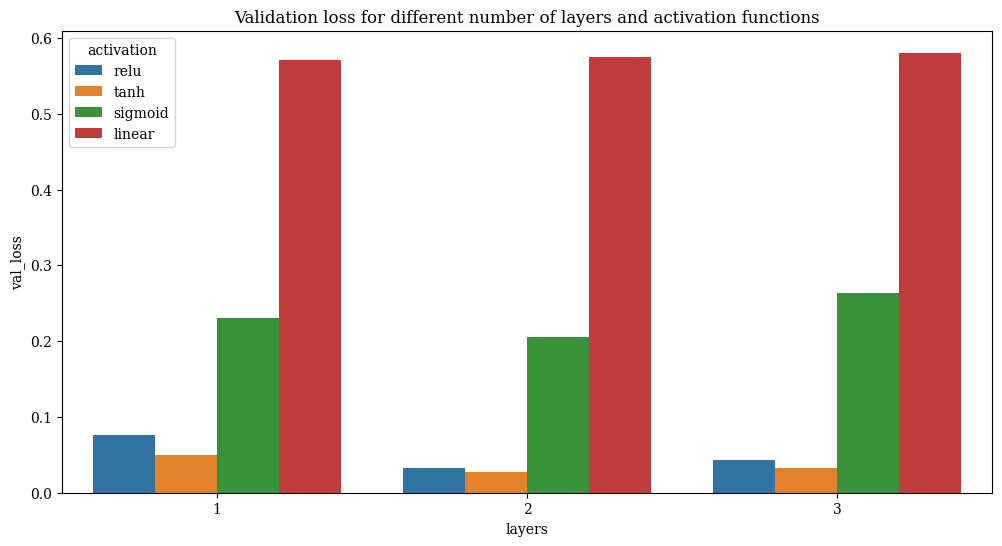

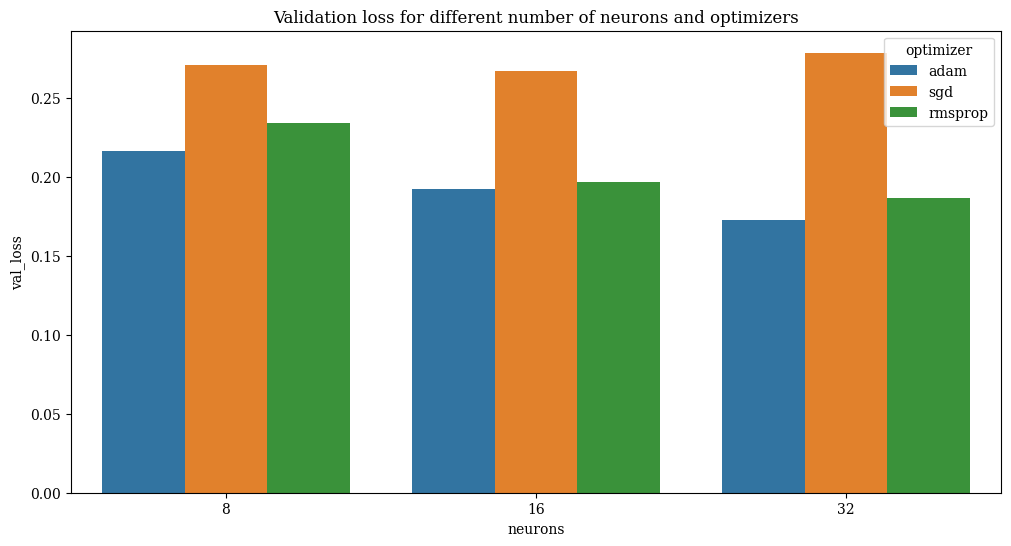

Best configurations based on validation loss:


,layers,neurons,activation,optimizer,loss,val_loss
146,3,8,relu,sgd,mse,0.001201
168,3,16,relu,adam,mse,0.001208
126,2,32,tanh,adam,mse,0.001271
194,3,32,relu,sgd,mse,0.001520
192,3,32,relu,adam,mse,0.001869
122,2,32,relu,sgd,mse,0.001901
82,2,8,tanh,rmsprop,mse,0.001928
96,2,16,relu,adam,mse,0.002025
174,3,16,tanh,adam,mse,0.002107
132,2,32,sigmoid,adam,mse,0.002159


In [ ]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='layers', y='val_loss', hue='activation', errorbar=None)
plt.title('Validation loss for different number of layers and activation functions')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='neurons', y='val_loss', hue='optimizer', errorbar=None)
plt.title('Validation loss for different number of neurons and optimizers')
plt.show()

print("Best configurations based on validation loss:")
display(df_results.sort_values('val_loss').head(10))
df_results.to_csv('best_configurations.csv', index=False)

### Observations on hyperparameters:

- Number of layers and neurons: Since the function to be fitted is a third-degree polynomial (which isn't overly complex), network models with many neurons and parameters aren't necessary. Therefore, no significant change in performance is observed as the model's complexity varies.

- Activation function: Regarding activation functions, there aren't significant differences either, except for the linear one, which performs worse than the others. The non-linearity of activation functions is what allows neural networks to be very expressive.

- Loss function: The choice of loss function doesn't significantly impact the results, as long as it is appropriate for regression tasks. The Mean Squared Error (MSE) is a common choice.

- Optimizer: For this simple regression task, there are no substantial differences in the choice of optimizer.


I will now evaluate the model's prediction outside the training data range.

Migliori parametri trovati:
layers               3
neurons              8
activation        relu
optimizer          sgd
loss               mse
val_loss      0.001201
Name: 146, dtype: object


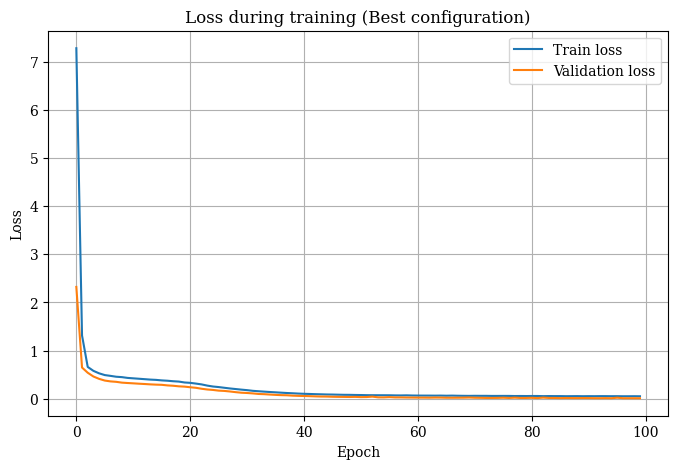

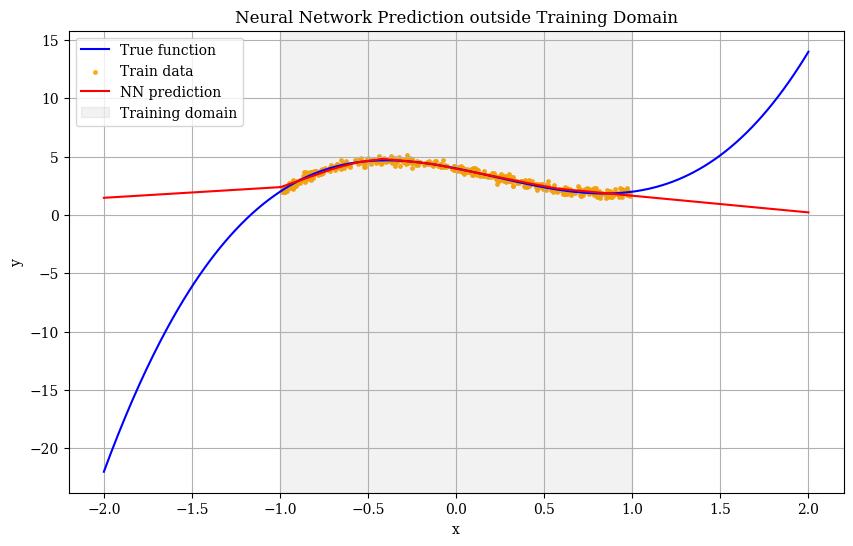

In [23]:
# Find the best parameters
best_params = df_results.sort_values('val_loss').iloc[0]
print("Migliori parametri trovati:")
print(best_params)

# Generate training and validation data
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 500)
y_train = cubic_function(x_train) + np.random.normal(0, 0.2, x_train.shape)
x_valid = np.random.uniform(-1, 1, 100)
y_valid = cubic_function(x_valid)

# Fit the model with the best parameters
model = tf.keras.Sequential()
model.add(Dense(int(best_params['neurons']), activation=best_params['activation'], input_shape=(1,)))
for _ in range(int(best_params['layers'])-1):
    model.add(Dense(int(best_params['neurons']), activation=best_params['activation']))
model.add(Dense(1))
model.compile(optimizer=best_params['optimizer'], loss=best_params['loss'], metrics=['mse'])

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_valid, y_valid),
    verbose=0
)

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training (Best configuration)')
plt.legend()
plt.grid(True)
plt.show()

# Test the model outside the training domain
x_test = np.linspace(-2, 2, 400)
y_true = cubic_function(x_test)
y_pred = model.predict(x_test, verbose=0)

plt.figure(figsize=(10,6))
plt.plot(x_test, y_true, label='True function', color='blue')
plt.scatter(x_train, y_train, alpha=0.9, label='Train data', color='orange', s = 6, edgecolor='orange')
plt.plot(x_test, y_pred, label='NN prediction', color='red')
plt.axvspan(-1, 1, color='grey', alpha=0.1, label='Training domain')
plt.title('Neural Network Prediction outside Training Domain')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

As anticipated, when the dataset lacks comprehensive coverage of the domain of interest, the network exhibits poor generalization capabilities, inevitably coupling its performance predominantly to the training domain. This is a common issue in machine learning, where models trained on limited data may struggle to extrapolate beyond the range of the training set.

One can try to mitigate this issue maybe using generalized feature (i.e. $x_i \to [1, x_i, x_i^2, x_i^3]$) or by adding a regularization term to the loss function which penalizes the discard of the third derivative of the function. However, this is not a common practice in machine learning but most importantly all this tecnhiques are based on the assumption that **the function to be fitted is a polynomial of order 3** and often one **doesn't know the analytical form of the function to be fitted**.

Here i report a regression using polinomial features.

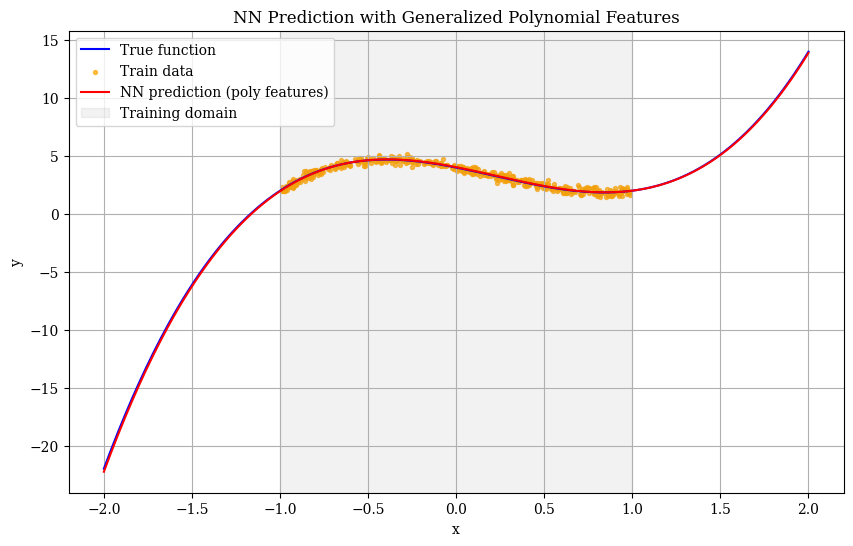

In [ ]:
def poly_features(x):
    x = np.asarray(x)
    return np.stack([np.ones_like(x), x, x**2, x**3], axis=1)

# Generate polynomial features
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 500)
X_train_poly = poly_features(x_train)
y_train = cubic_function(x_train) + np.random.normal(0, 0.2, x_train.shape)
x_valid = np.random.uniform(-1, 1, 100)
X_valid_poly = poly_features(x_valid)
y_valid = cubic_function(x_valid)

# Simple NN model
model_poly = tf.keras.Sequential([
    Dense(12, input_shape=(4,), activation='linear'),
    Dense(20, activation='linear'),
    Dense(1, activation='linear')
])
model_poly.compile(optimizer='adam', loss='mse', metrics=['mse'])

history_poly = model_poly.fit(
    X_train_poly, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_valid_poly, y_valid),
    verbose=0
)

# Test out of range
x_test = np.linspace(-2, 2, 400)
X_test_poly = poly_features(x_test)
y_true = cubic_function(x_test)
y_pred_poly = model_poly.predict(X_test_poly, verbose=0)

plt.figure(figsize=(10,6))
plt.plot(x_test, y_true, label='True function', color='blue')
plt.scatter(x_train, y_train, alpha=0.7, label='Train data', color='orange', s=8, edgecolor='orange')
plt.plot(x_test, y_pred_poly, label='NN prediction (poly features)', color='red')
plt.axvspan(-1, 1, color='grey', alpha=0.1, label='Training domain')
plt.title('NN Prediction with Generalized Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [ ]:
def f(x, y):
    return np.sin(x**2 + y**2)

N_train = 5000
N_valid = int(0.2 * N_train)

# Training data

x_train = np.random.uniform(-1.5, 1.5, (N_train, 2))
y_train = f(x_train[:, 0], x_train[:, 1]) + np.random.normal(0, 0.1, x_train.shape[0])

# Validation data
#x_valid = np.random.uniform(-1.5, 1.5, (N_valid, 2))
#y_valid = f(x_valid[:, 0], x_valid[:, 1]) + np.random.normal(0, 0.1, x_valid.shape[0])

# model
model_2d = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_2d.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history_2d = model_2d.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


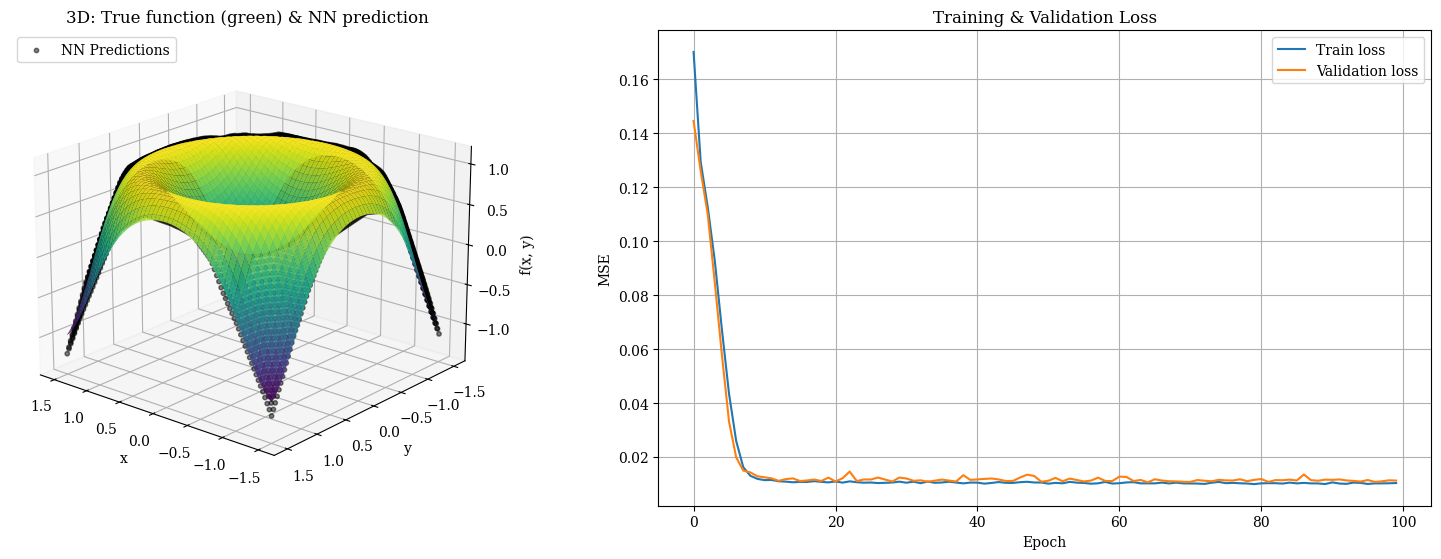

In [29]:
x_grid = np.linspace(-1.5, 1.5, 100)
y_grid = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z_true = f(X, Y)

grid_points = np.column_stack([X.ravel(), Y.ravel()])
Z_pred = model_2d.predict(grid_points, verbose=0).reshape(X.shape)

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z_true, cmap='viridis', alpha=0.9)
# Plot predicted surface
#ax1.plot_surface(X, Y, Z_pred, cmap='autumn', alpha=0.5)
ax1.scatter(grid_points[:, 0], grid_points[:, 1], Z_pred.ravel(), color='k',alpha= 0.5, s=10, label='NN Predictions')
ax1.set_title('3D: True function (green) & NN prediction')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.legend(loc='upper left')
ax1.view_init(elev=20, azim=130)

# Plot training and validation loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history_2d.history['loss'], label='Train loss')
ax2.plot(history_2d.history['val_loss'], label='Validation loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE')
ax2.set_title('Training & Validation Loss')
ax2.legend(loc ='upper right')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])

The neural network is able to fit very well also a 3d function.